To read more about Datset can be found at http://archive.ics.uci.edu/ml/datasets/Heart+Disease

## Import Libraries and Dataset

In [0]:

import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import seaborn as sns


In [0]:

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [0]:
# import the heart disease dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# the names will be the names of each column in our pandas DataFrame
names = ['age',
        'sex',
        'cp',
        'trestbps',
        'chol',
        'fbs',
        'restecg',
        'thalach',
        'exang',
        'oldpeak',
        'slope',
        'ca',
        'thal',
        'class']

# read the csv
cleveland = pd.read_csv(url, names=names)
data=cleveland

In [645]:
print ((cleveland.shape))
print (cleveland.loc[1])

(303, 14)
age          67
sex           1
cp            4
trestbps    160
chol        286
fbs           0
restecg       2
thalach     108
exang         1
oldpeak     1.5
slope         2
ca          3.0
thal        3.0
class         2
Name: 1, dtype: object


In [646]:
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


### Data Cleaning:

Data Cleaning: Drop rows with "?"

In [0]:
data = data[~data.isin(['?'])]


In [648]:
data = data.dropna(axis=0)
data.shape

(297, 14)

In [649]:
print (data.shape)
print (data.dtypes)

(297, 14)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


# Data Visualization:


Pie Chart and Bar Plot to understand frequency for each class:

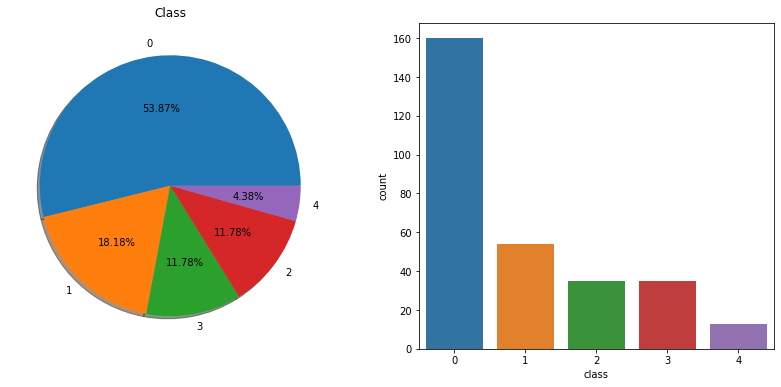

In [650]:


# create two plots side by side
f, ax = plt.subplots(1,2,figsize=(14,6))
data['class'].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0], shadow=True)
ax[0].set_title('Class')
ax[0].set_ylabel('')
sns.countplot('class', data=data, ax=ax[1])
plt.show()



Plotting Histograms:

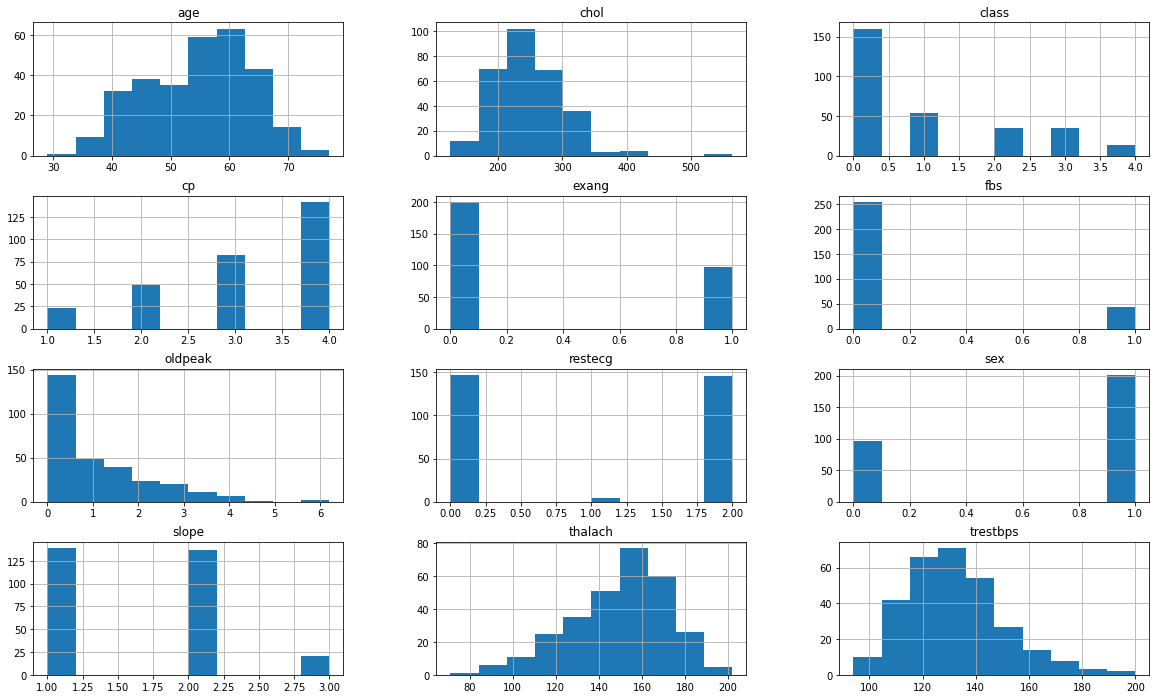

In [651]:
data.hist(figsize = (20, 12))
plt.show()

create swarmplot inside the violinplot for each class:


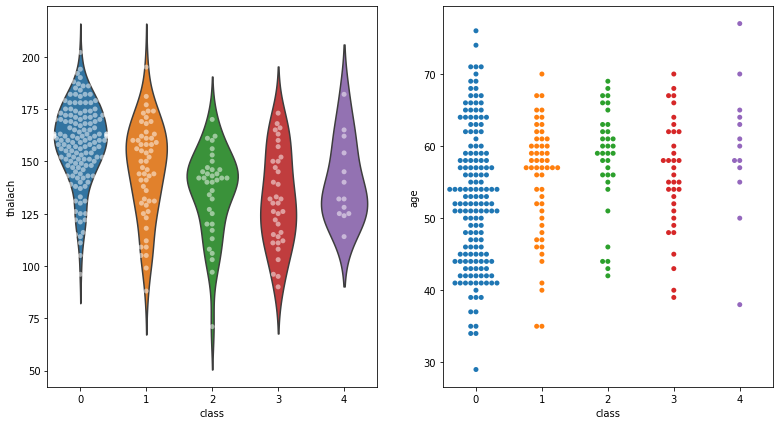

In [652]:


plt.figure(figsize=(13,7))
plt.subplot(121)
sns.violinplot(x="class", y="thalach", data=data, inner=None)
sns.swarmplot(x='class', y="thalach", data=data, color='w', alpha=0.5)
plt.subplot(122)
sns.swarmplot(x='class', y='age', data=data)
plt.show()



Heatmap Generation:

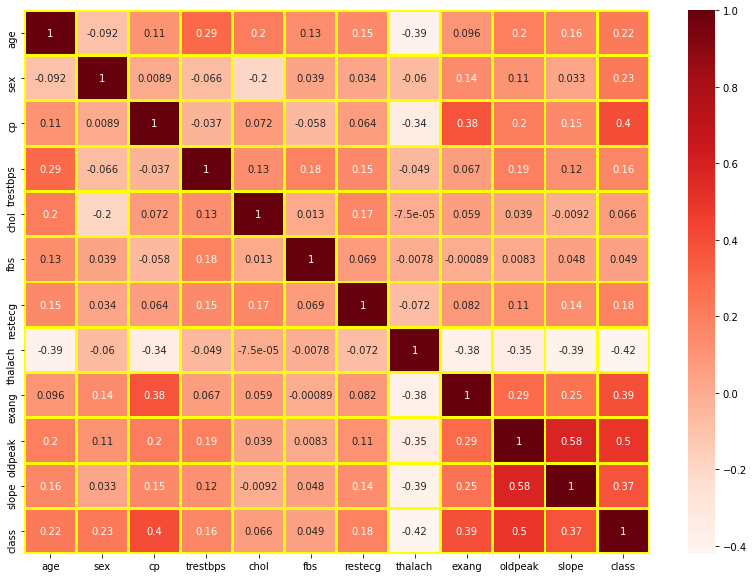

In [653]:
plt.figure(figsize = (14, 10)) 
sns.heatmap(data.corr(), cmap='Reds',annot=True, linecolor='Yellow', linewidths=2.0)
plt.show()

catplot between sex and distribution of target class frequency based on sex:

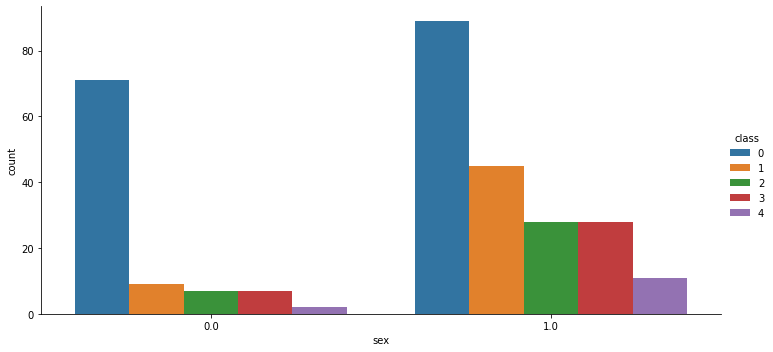

In [654]:
#plt.figure(figsize = (50, 20)) 

sns.catplot(data=data, kind='count', x='sex',hue='class',height=5, aspect=2)
plt.show()

catplot between distribution of target class frequency based on number of major vessels (0-3) colored by flourosopy:

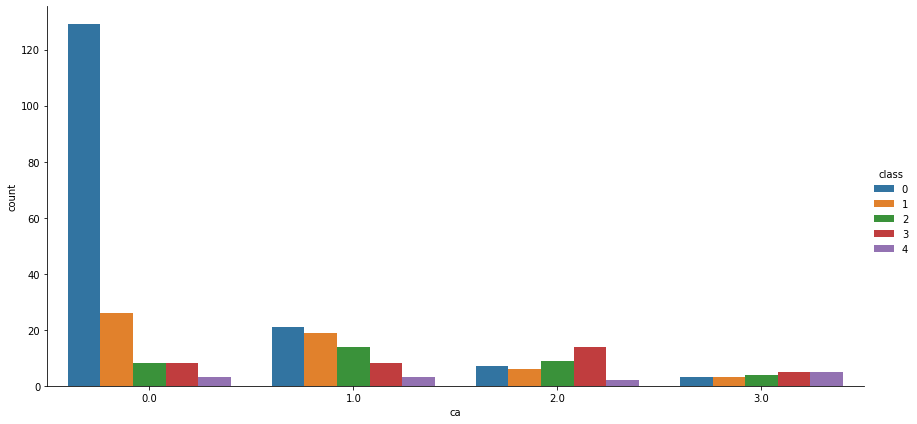

<Figure size 3600x1440 with 0 Axes>

In [655]:

sns.catplot(data=data, kind='count', x='ca',hue='class',height=6, aspect=2)
plt.figure(figsize = (50, 20)) 

plt.show()

catplot between distribution of target class frequency based on chest pain type

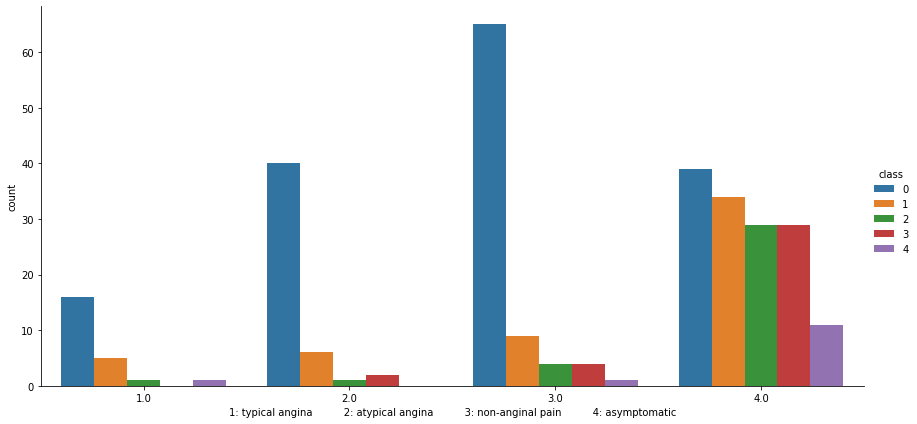

<Figure size 3600x1440 with 0 Axes>

In [656]:

sns.catplot(data=data, kind='count', x='cp',hue='class',height=6, aspect=2)
plt.xlabel("1: typical angina          2: atypical angina          3: non-anginal pain          4: asymptomatic")
plt.figure(figsize = (50, 20)) 

plt.show()

Scatter Plot

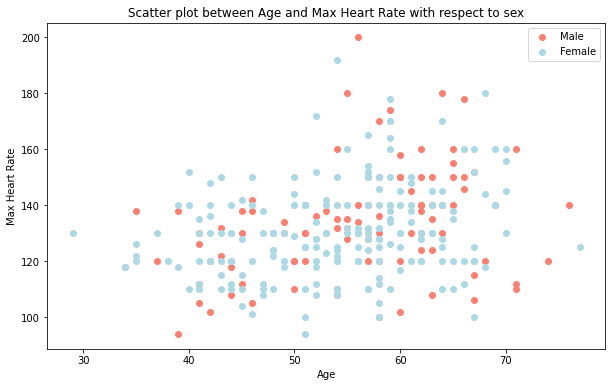

In [657]:
# create another figure

plt.figure(figsize=(10,6))

# scatter with positive examples
plt.scatter(data.age[data.sex==0],
            data.trestbps[data.sex==0],
            c="salmon");

# scatter with negative exaples
plt.scatter(data.age[data.sex==1],
            data.trestbps[data.sex==1],
            c="lightblue");
plt.title("Scatter plot between Age and Max Heart Rate with respect to sex")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Male", "Female"]);

crosstab creation:

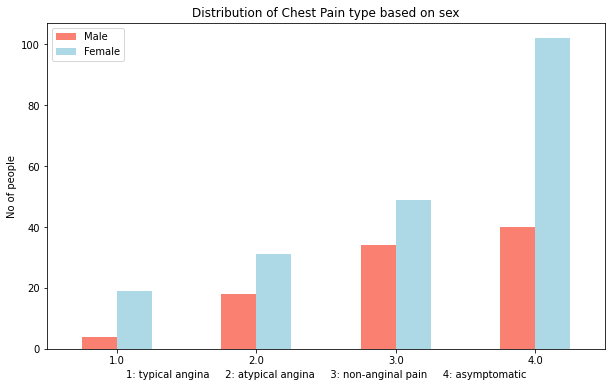

In [658]:


# Making it more visual

pd.crosstab(data.cp,data.sex).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])

plt.title("Distribution of Chest Pain type based on sex")
plt.xlabel("1: typical angina     2: atypical angina     3: non-anginal pain     4: asymptomatic")
plt.ylabel("No of people")
plt.legend(["Male", "Female"]);
plt.xticks(rotation=0);



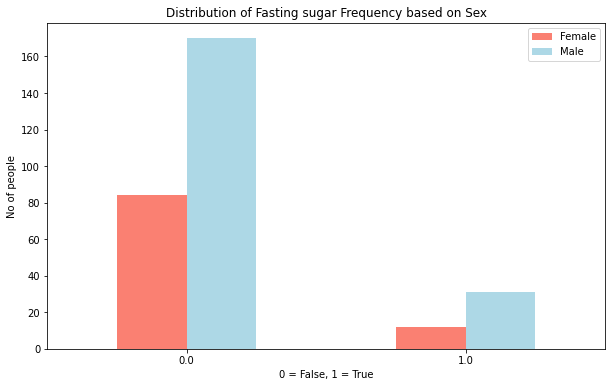

In [659]:


pd.crosstab(data.fbs, data.sex).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Distribution of Fasting sugar Frequency based on Sex")
plt.xlabel("0 = False, 1 = True")
plt.ylabel("No of people")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);



Plotting catplot with two variables:

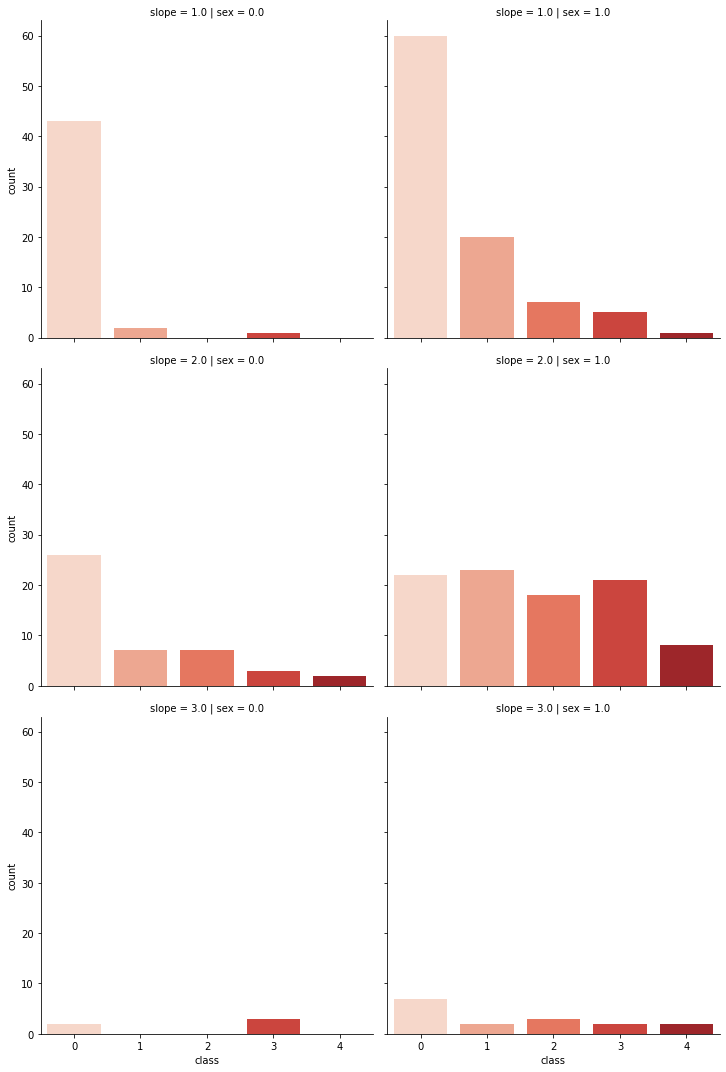

In [660]:
sns.catplot(data=data, kind='count', x='class', col='sex',row='slope', palette='Reds')
plt.show()

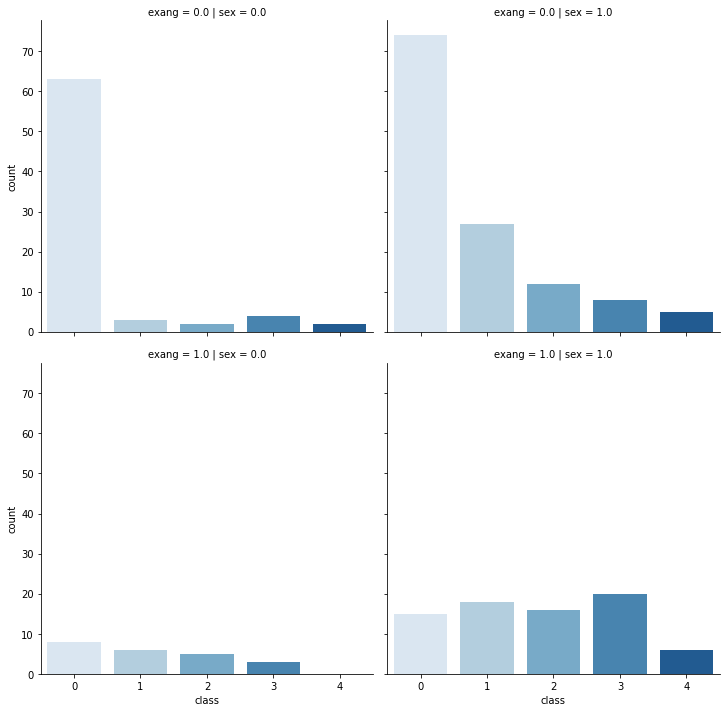

In [661]:
sns.catplot(data=data, kind='count', x='class', col='sex',row='exang', palette='Blues')
plt.show()

Plotting countplot:

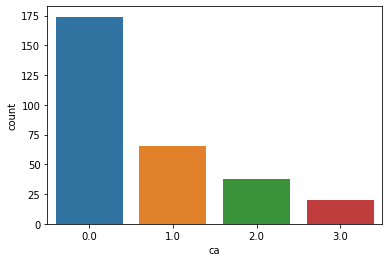

In [662]:
sns.countplot(data["ca"])

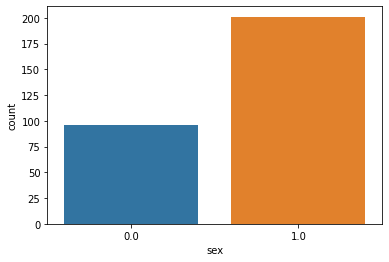

In [663]:
sns.countplot(data["sex"])

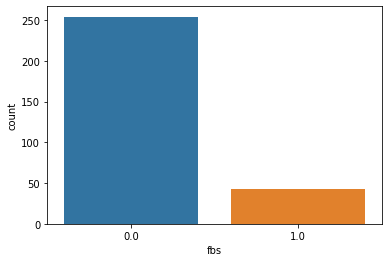

In [664]:
sns.countplot(data["fbs"]) 

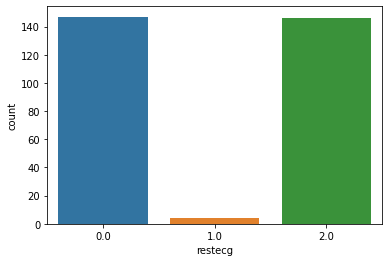

In [665]:
sns.countplot(data["restecg"])

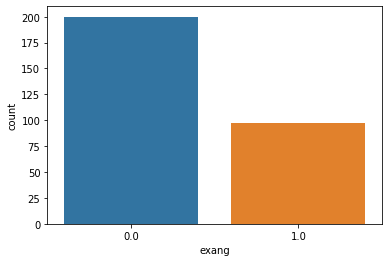

In [666]:
sns.countplot(data["exang"])

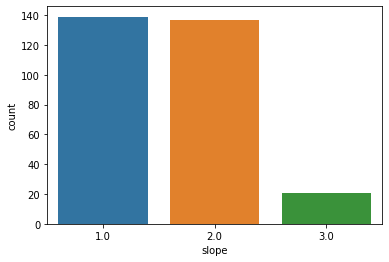

In [667]:
sns.countplot(data["slope"])

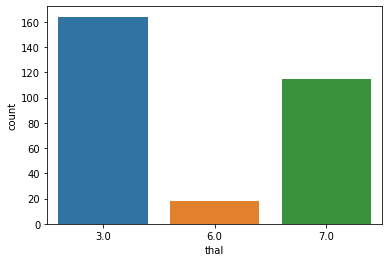

In [668]:
sns.countplot(data["thal"])

Plotting univariate distributions:

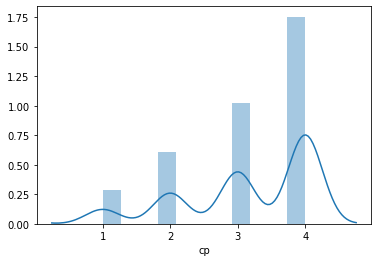

In [669]:
sns.distplot(data["cp"])

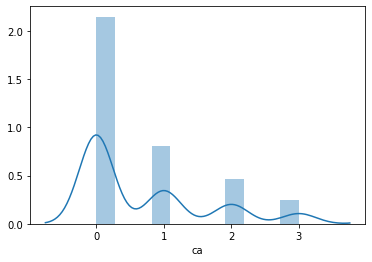

In [670]:
sns.distplot(data["ca"])

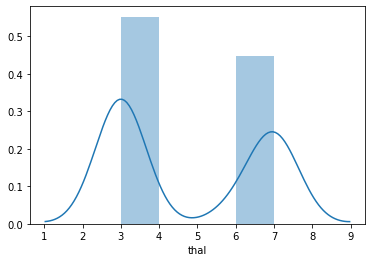

In [671]:
sns.distplot(data["thal"])

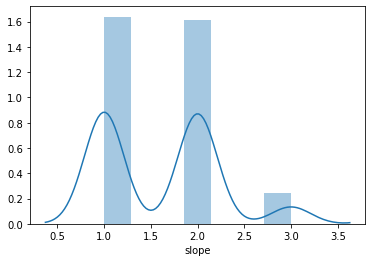

In [672]:
sns.distplot(data["slope"])

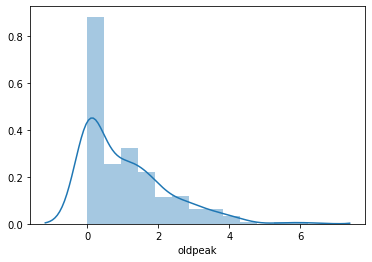

In [673]:
sns.distplot(data["oldpeak"])

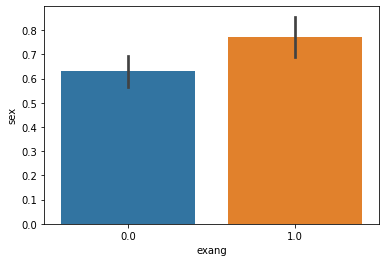

In [674]:
y = data["sex"]

sns.barplot(data["exang"],y)


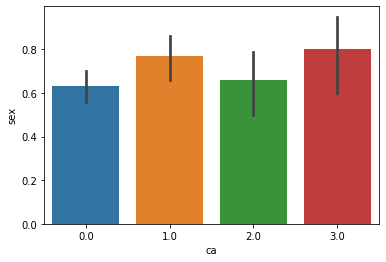

In [675]:
sns.barplot(data["ca"],y)

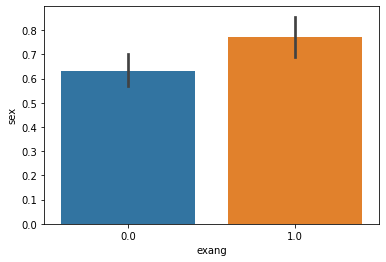

In [676]:
sns.barplot(data["exang"],y)


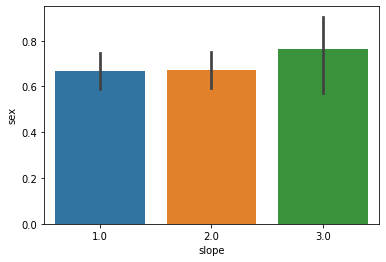

In [677]:
sns.barplot(data["slope"],y)


### Algorith Implementation:

Neural Network:

In [0]:

# create X and Y datasets for training
from sklearn import model_selection

X = np.array(data.drop(['class'], 1))
y = np.array(data['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [679]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(237, 5)
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [680]:

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 8)                 112       
_________________________________________________________________
dense_44 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_45 (Dense)             (None, 5)                 25        
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________
None


In [681]:
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose = 1)


Epoch 1/100
237/237 [==============================] - 0s 414us/step - loss: 1.4188 - accuracy: 0.5527
Epoch 2/100
237/237 [==============================] - 0s 118us/step - loss: 1.3669 - accuracy: 0.5485
Epoch 3/100
237/237 [==============================] - 0s 128us/step - loss: 1.3396 - accuracy: 0.5570
Epoch 4/100
237/237 [==============================] - 0s 121us/step - loss: 1.3424 - accuracy: 0.5274
Epoch 5/100
237/237 [==============================] - 0s 122us/step - loss: 1.3081 - accuracy: 0.5570
Epoch 6/100
237/237 [==============================] - 0s 137us/step - loss: 1.2923 - accuracy: 0.5570
Epoch 7/100
237/237 [==============================] - 0s 134us/step - loss: 1.2810 - accuracy: 0.5570
Epoch 8/100
237/237 [==============================] - 0s 134us/step - loss: 1.2719 - accuracy: 0.5570
Epoch 9/100
237/237 [==============================] - 0s 131us/step - loss: 1.2500 - accuracy: 0.5570
Epoch 10/100
237/237 [==============================] - 0s 123us/step - l

To improve accuracy convert into binary classification problem - heart disease or no heart disease


In [682]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print (Y_train_binary[:20])

[0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0]


In [683]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))

    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 16)                224       
_________________________________________________________________
dense_47 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_48 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 5         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
None


In [684]:

# fit the binary model on the training data
binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
237/237 [==============================] - 0s 582us/step - loss: 0.7049 - accuracy: 0.4430
Epoch 2/100
237/237 [==============================] - 0s 129us/step - loss: 0.6877 - accuracy: 0.5612
Epoch 3/100
237/237 [==============================] - 0s 139us/step - loss: 0.6841 - accuracy: 0.5612
Epoch 4/100
237/237 [==============================] - 0s 134us/step - loss: 0.6845 - accuracy: 0.5612
Epoch 5/100
237/237 [==============================] - 0s 128us/step - loss: 0.6804 - accuracy: 0.5612
Epoch 6/100
237/237 [==============================] - 0s 134us/step - loss: 0.6786 - accuracy: 0.5612
Epoch 7/100
237/237 [==============================] - 0s 127us/step - loss: 0.6751 - accuracy: 0.5612
Epoch 8/100
237/237 [==============================] - 0s 138us/step - loss: 0.6716 - accuracy: 0.5612
Epoch 9/100
237/237 [==============================] - 0s 147us/step - loss: 0.6660 - accuracy: 0.5612
Epoch 10/100
237/237 [==============================] - 0s 134us/step - l

In [685]:
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model
0.55
              precision    recall  f1-score   support

           0       0.66      1.00      0.79        27
           1       1.00      0.13      0.24        15
           2       0.00      0.00      0.00         8
           3       0.24      0.80      0.36         5
           4       0.00      0.00      0.00         5

    accuracy                           0.55        60
   macro avg       0.38      0.39      0.28        60
weighted avg       0.57      0.55      0.45        60



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [686]:

# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Results for Binary Model
0.8166666666666667
              precision    recall  f1-score   support

           0       0.72      0.96      0.83        27
           1       0.96      0.70      0.81        33

    accuracy                           0.82        60
   macro avg       0.84      0.83      0.82        60
weighted avg       0.85      0.82      0.82        60



## KNN Algorithm

In [0]:

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# the names will be the names of each column in our pandas DataFrame
names = ['age',
        'sex',
        'cp',
        'trestbps',
        'chol',
        'fbs',
        'restecg',
        'thalach',
        'exang',
        'oldpeak',
        'slope',
        'ca',
        'thal',
        'class']

# read the csv
datset = pd.read_csv(url, names=names)

In [688]:
datset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [0]:
# remove null values as less values
data = cleveland[~cleveland.isin(['?'])]    
#dropping row
data = data.dropna(axis=0) 


In [690]:
print (data.shape)
print (data.dtypes)

(297, 14)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


In [0]:
data = data.apply(pd.to_numeric)
data.dtypes
# print (data.shape)
# print (data.dtypes)
# print(data)
colnames_numeric = data.columns[0:14]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[colnames_numeric] = scaler.fit_transform(data[colnames_numeric])
X = np.array(data)
y = np.array(data['class'])

#print(X)
# y

In [0]:
y[y>0]=1


In [0]:
data['class']=y
#data1 = data


In [0]:

df = data.values.tolist()


In [0]:

#Breaking the data into training and test set
import random
def train_test_split(data, split, trainingSet = [], testSet = []):
    for x in range(len(data)):
        if random.random() < split:
            trainingSet.append(data[x])
        else:
            testSet.append(data[x])

In [0]:

trainingSet = []
testSet = []
split = 0.8
train_test_split(df, split, trainingSet, testSet)

In [697]:
len(trainingSet)


229

In [698]:
len(testSet)



68

In [0]:
#Define Euclidean distances
import math
def Euclideandist(x,xi, length):
    d = 0.0
    for i in range(length):
        d += pow(float(x[i])- float(xi[i]),2)
    return math.sqrt(d)

In [0]:

#Getting the K neighbours having the closest Euclidean distance to the test instance
import operator
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = Euclideandist(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [0]:

#After sorting the neighbours based on their respective classes, max voting to give the final class of the test instance
import operator
def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)#Sorting it based on votes
	return sortedVotes[0][0] #Please note we need the class for the top voted class, hence [0][0]#

In [0]:

#Getting the accuracy
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] == predictions[x]:
			correct += 1
	return (correct/(len(testSet))) * 100.0

In [0]:
# generate predictions
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
predictions=[]
actual = []
k = 3
for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet[x], k)
    result = getResponse(neighbors)
    predictions.append(result)
    actual.append(testSet[x][-1])
    #print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
#print (predictions)
#print(actual)
results = confusion_matrix(actual, predictions) 
  


In [704]:
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predictions)) 
print ('Report : ')
print (classification_report(actual, predictions)) 
accuracy = getAccuracy(testSet, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

Confusion Matrix :
[[28  8]
 [ 7 25]]
Accuracy Score : 0.7794117647058824
Report : 
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79        36
         1.0       0.76      0.78      0.77        32

    accuracy                           0.78        68
   macro avg       0.78      0.78      0.78        68
weighted avg       0.78      0.78      0.78        68

Accuracy: 77.94117647058823%


Text(0.5, 15.0, 'Predicted Label')

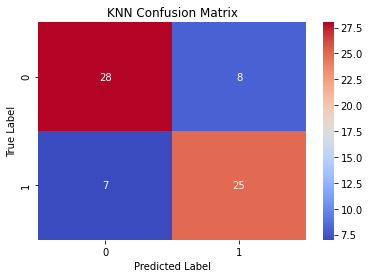

In [705]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, confusion_matrix, classification_report
import seaborn as sns



nnbc_cm = confusion_matrix(actual,predictions)

ax = sns.heatmap(nnbc_cm,annot=True,cmap='coolwarm',fmt='.0f')
ax.set_title('KNN Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

# LOGISTIC REGRESSION

In [0]:
class LogisticRegression:  
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):  
        self.lr = lr  
        self.num_iter = num_iter  
        self.fit_intercept = fit_intercept  
        self.verbose = verbose  
     
    def __add_intercept(self, X):  
        intercept = np.ones((X.shape[0], 1))  
        return np.concatenate((intercept, X), axis=1)  
     
    def __sigmoid(self, z):  
        return 1 / (1 + np.exp(-z))  
    def __loss(self, h, y):  
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()  
     
    def fit(self, X, y):  
        if self.fit_intercept:  
            X = self.__add_intercept(X)  
         
        # weights initialization  
        self.theta = np.zeros(X.shape[1])  
         
        for i in range(self.num_iter):  
            z = np.dot(X, self.theta)  
            h = self.__sigmoid(z)  
            gradient = np.dot(X.T, (h - y)) / y.size  
            self.theta -= self.lr * gradient  
             
            z = np.dot(X, self.theta)  
            h = self.__sigmoid(z)  
            loss = self.__loss(h, y)  
                 
            if(self.verbose ==True and i % 10000 == 0):  
                print(f'loss: {loss} \t')  
     
    def predict_prob(self, X):  
        if self.fit_intercept:  
            X = self.__add_intercept(X)  
     
        return self.__sigmoid(np.dot(X, self.theta))  
     
    def predict(self, X):  
        return self.predict_prob(X).round()


In [0]:
df= pd.read_csv(url, names=names)

In [0]:
# print(df)

In [0]:
# remove null values as less values
df = df[~df.isin(['?'])]    
#dropping row
df = df.dropna(axis=0) 


In [0]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
d= pd.get_dummies(df['ca'], prefix = "ca")
frames = [df, a, b, c,d]
df = pd.concat(frames, axis = 1)
df = df.drop(columns = ['cp', 'thal', 'slope', 'ca'])

In [0]:
#15613

In [712]:
df.shape

(297, 24)

In [713]:
df['class'].value_counts()

0    160
1     54
3     35
2     35
4     13
Name: class, dtype: int64

In [0]:
df['class'] = df['class'].apply(lambda x : 1 if x >= 1 else 0)

In [0]:
df = df.apply(pd.to_numeric)

In [716]:
df['class'].value_counts()

0    160
1    137
Name: class, dtype: int64

In [0]:
Y = df['class']
X_original = df.drop(['class','oldpeak'], axis = 1)


In [0]:
X= (X_original - np.min(X_original)) / (np.max(X_original) - np.min(X_original))

In [0]:
# create X and Y datasets for training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = 0.3)
#reset index

In [720]:
type(X_train)

pandas.core.frame.DataFrame

In [0]:
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [722]:
model = LogisticRegression(lr=0.001, num_iter=10000)  
get_ipython().magic(u'time model.fit(X_train, y_train)')

preds_test = model.predict(X_test)
preds_train = model.predict(X_train)




CPU times: user 12.2 s, sys: 19.3 ms, total: 12.3 s
Wall time: 12.3 s


In [0]:
q = pd.DataFrame(np.around(preds_test)) #prediciton
#print(q)

In [0]:
q['train']=pd.DataFrame(np.around(preds_train))
q['test class']=y_test
#print(q)

In [725]:
q['class train']=y_train
#print(q)
print('Test Accuracy:',q.loc[q[0]==q['test class']].shape[0] / q.shape[0] * 100)

from sklearn import metrics
print('Test Precision Score: ',metrics.precision_score(y_test, preds_test))
print('Test Recall Score: ',metrics.recall_score(y_test, preds_test))
print('Test f1 Score: ',metrics.f1_score(y_test, preds_test))

Test Accuracy: 86.66666666666667
Test Precision Score:  0.9166666666666666
Test Recall Score:  0.7857142857142857
Test f1 Score:  0.8461538461538461


              precision    recall  f1-score   support

           0       0.83      0.94      0.88        48
           1       0.92      0.79      0.85        42

    accuracy                           0.87        90
   macro avg       0.88      0.86      0.86        90
weighted avg       0.87      0.87      0.87        90



Text(0.5, 15.0, 'Predicted Label')

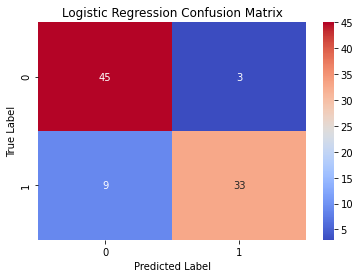

In [726]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, confusion_matrix, classification_report
import seaborn as sns
print(classification_report(y_test, preds_test))


lr_cm = confusion_matrix(y_test, preds_test)

ax = sns.heatmap(lr_cm,annot=True,cmap='coolwarm',fmt='.0f')
ax.set_title('Logistic Regression Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')


# SVM

In [0]:
import numpy as np
import math

'---------------------------------------------------------'


# Functions

def threshold(array):
    for i in range(len(array)):
        if array[i] > 0:
            array[i] = 1
    return array


'---------------------------------------------------------'


# class

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, iterations=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.iterations = iterations
        self.w = None
        self.b = None

    def fit(self, x_train, y_train):
        y_ = np.where(y_train <= 0, -1, 1)
        numberOfSamples, numberOfFeatures = x_train.shape
        # print(x_train)

        self.w = np.zeros(numberOfFeatures)
        # print(self.w)
        self.b = 0

        for _ in range(self.iterations):
            for index, x_i in enumerate(x_train):
                # print('yindex--',y_[index])
                # print('x_i--', x_i)
                # print()
                # print('dot--', np.dot(x_i,self.w))
                condition = y_[index] * (np.dot(x_i, self.w)) - self.b
                # print('condition--',condition)
                # print('x_i.shape',x_i.shape)
                # print('y_index.shape',y_[index].shape)
                # print(y_[index])

                if condition >= 1:
                    self.w = self.w - self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w = self.w - self.lr * (2 * self.lambda_param * self.w - (x_i * y_[index]))
                    self.b = self.b - self.lr * y_[index]

    def predict(self, x_test):
        linear_output = np.dot(self.w, x_test) - self.b
        return np.sign(linear_output)





In [0]:
data = np.genfromtxt(url, delimiter=',')

t = 100  # <-------------------------------------no. of training samples
f = [2,3,5,7,11,13] # <-----------------feature selection

x_train = data[0:t, f]

y1_train = data[0:t, 13:14]
y_train = threshold(y1_train)
#print(y1_train)

x_test = data[t + 1:301, f]
y1_test = data[t + 1:301, 13:14]
y_test = threshold(y1_test)



In [729]:
svm = SVM()
svm.fit(x_train, y_train)

print('weight--', svm.w)

w1 = np.reshape(svm.w, (len(f), 1))

y_pre = []
sum = 0
count = 0
for i in range(len(y1_test)):
    sum = sum + (np.where((np.dot(x_test[i], w1)) <= 0, 0, 1))

    if (np.where((np.dot(x_test[i], w1)) <= 0, 0, 1)) == y_test[i]:
        count = count + 1

    #print("actual: ", y_test[i], "predicted: ", (np.where((np.dot(x_test[i], w1)) <= 0, 0, 1)))
    y_pre.append(np.where((np.dot(x_test[i], w1)) <= 0, 0, 1))

print('count', count)



weight-- [ 0.86152406  0.02704144 -0.01301449 -0.05197008  0.90939667  6.09215396]
count 188


In [730]:
print('SVM TEST Accuracy using selected features=', 100 * count / len(y1_test))

SVM TEST Accuracy using selected features= 94.0


              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94       105
         1.0       0.89      1.00      0.94        95

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



Text(0.5, 15.0, 'Predicted Label')

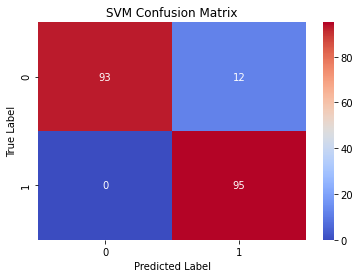

In [731]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, confusion_matrix, classification_report
import seaborn as sns
print(classification_report(y_test, y_pre))


lr_cm = confusion_matrix(y_test, y_pre)

ax = sns.heatmap(lr_cm,annot=True,cmap='coolwarm',fmt='.0f')
ax.set_title('SVM Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
